# <center>Predicción de Diabetes</center>

## Visión global del problema
La diabetes es una enfermedad crónica que afecta la forma en que el cuerpo procesa la glucosa, que es el azúcar en la sangre y la principal fuente de energía para las células. Cuando una persona tiene diabetes, su cuerpo tiene dificultades para regular los niveles de glucosa en la sangre, lo que puede llevar a problemas de salud a largo plazo.
El objetivo es a partir de un conjunto de datos proviene de un estudio realizado en la comunidad de los indios Pima en Arizona, Estados Unidos, desarrollar un sistema de detección con cierta probabilidad casos de diabetes para la población.
Se pretende usar algoritmos de aprendizaje supervisado como Arboles de Decisión, Bosques Aleatorios, Regresión lineal, y k vecinos más cercanos y medir su rendimiento en base a un conjunto de pruebas del dataset original con la métrica error cuadrático medio.

# Datos
Los datos proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a mediciones diagnósticas si un paciente tiene diabetes.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('datos/diabetes.csv')

In [2]:
#informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Tenemos 768 registros, cada uno con 9 atributos (todos los atributos son flotante o enteros). Este conjunto de datos ocupa solamente 54.1KB por lo que sin problemas podemos guardarlo en nuestra maquina.
Como trabajaremos con algoritmos supervisados, podemos dividir el conjunto de datos original en un conjutno de entrenamiento y prueba.
Los atributos del conjunto del dataset son:
    Embarazos: Número de veces que la paciente ha estado embarazada.

    1. Glucosa: Concentración de glucosa en plasma en dos horas en una prueba de tolerancia a la glucosa (medida en mg/dL , esta medida represanta cuantos miligramos de glucosa estan presentes por cada dL de sangre).

    2. Presión arterial: Presión arterial diastólica (mm Hg).

    3. Espesor de la piel: Grosor del pliegue cutáneo del tríceps (mm).

    4. Insulina: Cantidad de insulina en suero en dos horas (mu U/ml, esta unidad representa cuantas micro unidades internacionales de actividade biologica de insulina estan presentes por cada ml de snagre). 

    5. IMC: Índice de masa corporal, que relaciona el peso y la altura (kg/m2)

    6. Función del Pedigree de Diabetes: Una función que se utiliza para estimar el riesgo de diabetes basado en el historial familiar.

    7. Edad: Edad de la paciente.

    8. Resultado: Variable de clase binaria que indica si la paciente tiene diabetes (1) o no (0).
    
Buscamos una descripcion general del dataset.

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Esta tabla nos proporciona informacion valiosa como el promedio de cada variable como la media, la desviacion estandar(que tanto varian los datos respecto a su media) y tambien los cuartiles que de alguna manera nos dicen como se distribuyen los datos.
Realizamos un histograma para buscar patrones en los atributos:

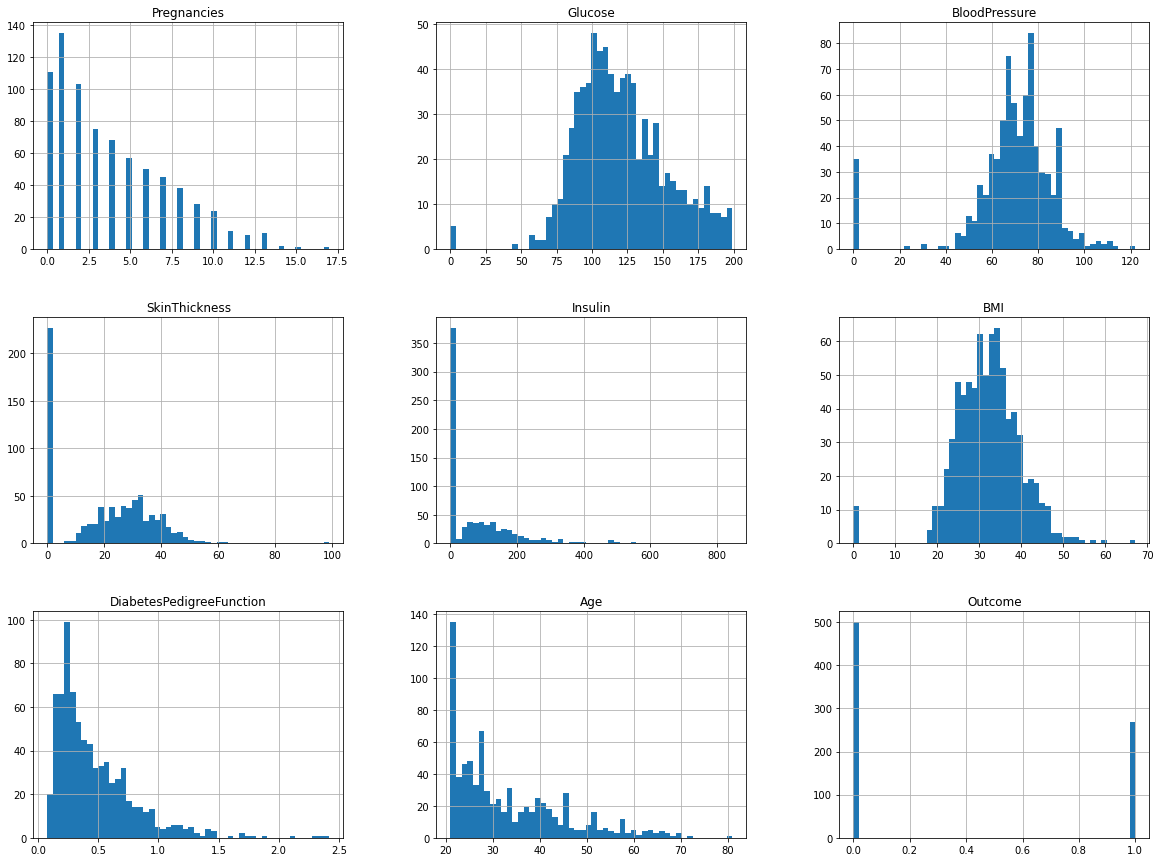

In [9]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Algunso atributos como la glucosa, la presión arteria, el espesor de la piel, la insulina, el INC, se podrian ajustar a un comportamiento normal exepto por los valores atipicos que tienen en sus respectivos lados izquierdos. Para los otros atributos de igual manera se puede buscar un ajuste.
La relación que mas nos interesa es buscar uan relación de los atributos respecto al target.

Buscamos si hay relaciones lineales de cada atributo respecto a si pueden padecer o no diabetes.

In [12]:
corr=data.corr()
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

No se encontro nigunal relación lineal entre el Outcome y cada atributo.
Hacemos diagramas de correlación.

array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', 

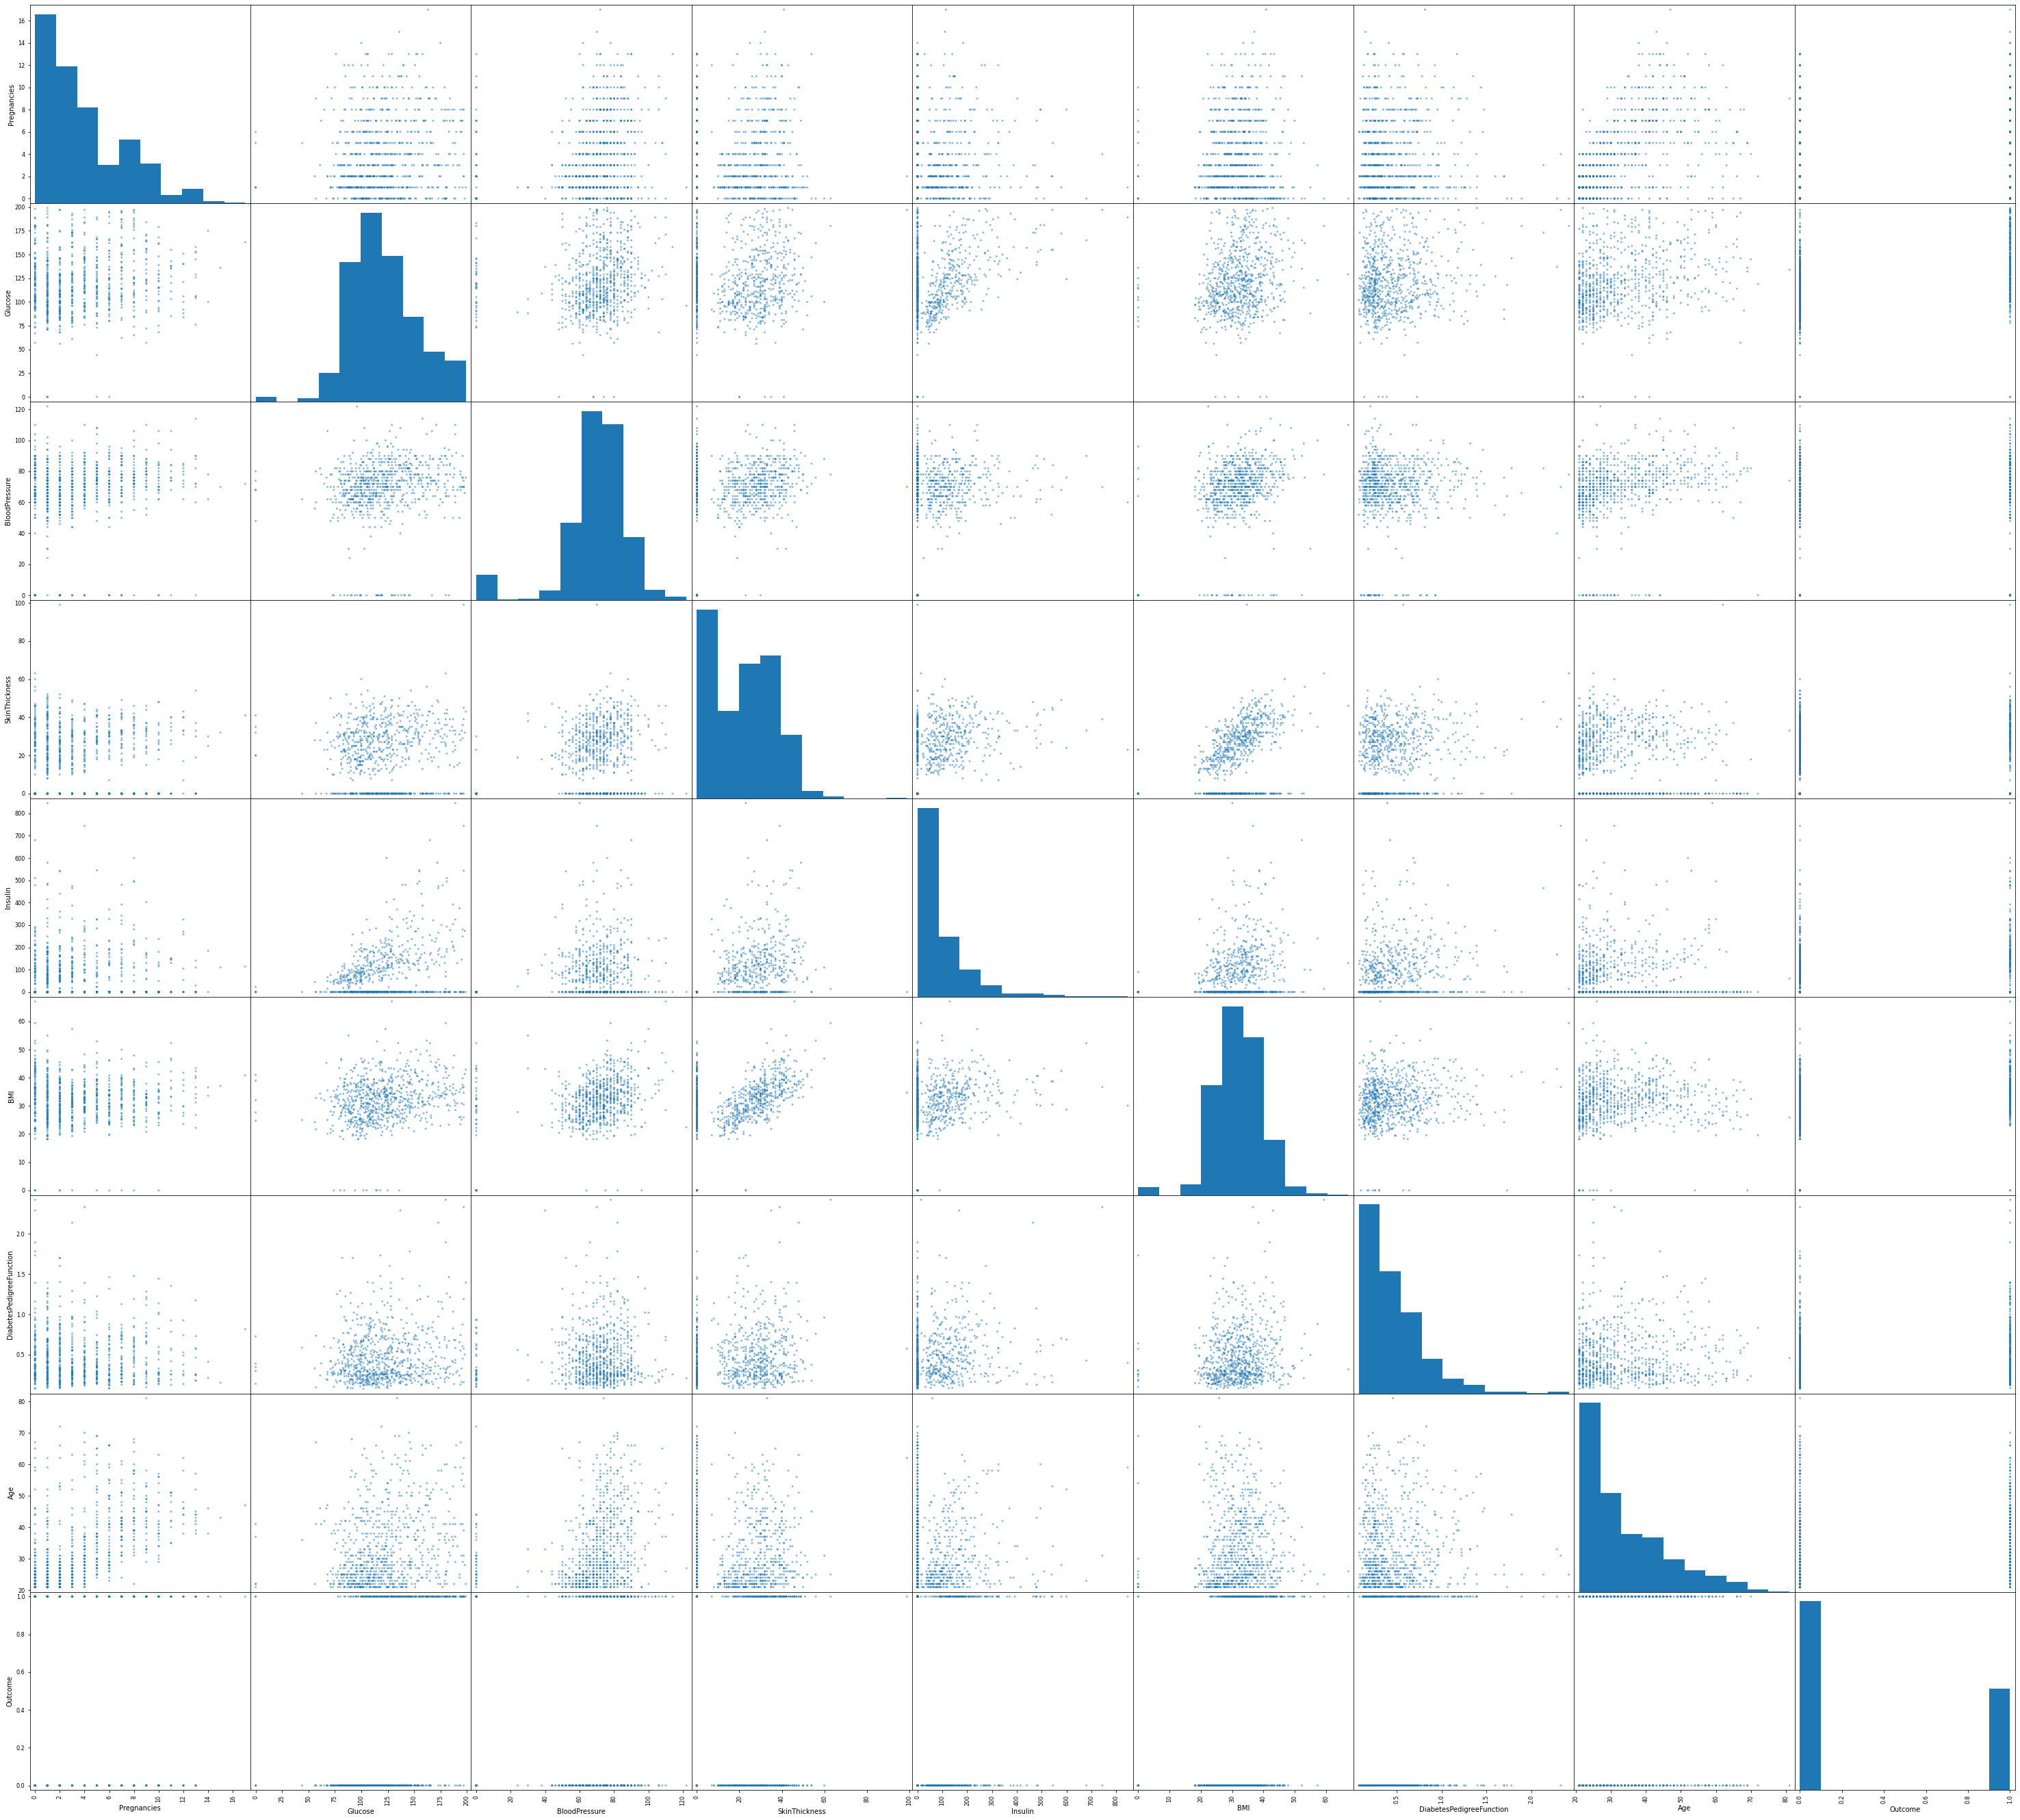

In [38]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(52,48))


# Preparación de los datos

In [45]:
from sklearn.model_selection import train_test_split
X = data.drop(['Outcome'], axis=1).values
y = data[['Outcome']].values

X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=0)



Para algoritmos de regresion es importante verificar que no haya valores nulos en los atributos, asi mismo para este mismo tipo es indispensable normalizar o escalr los datos, sin embargo estamos en el caso de un problema de clasificación.

# Seleccionamos un modelo y lo entrenamos 
Usaremos para estudiar este problema los algoritmos Arboles de desición, Bosques aleatorios y k vecinos mas cercanos.
## Decision Trees

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

arbol_clasificador = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=5)
arbol_clasificador.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)

Probamos el modelo entrenado con los datos de prueba

In [47]:
y_pred=arbol_clasificador.predict(X_test)

Obtenemos el rendimiento del algoritmo con los datos de prueba

In [48]:
arbol_clasificador.score(X_test,y_test)

0.7708333333333334

Hemos un rendmiento en el modelo de 77 %. Intentemos mejorar el resultado modificando los parametros del algoritmo.
### Ajustando DecisionTree

In [50]:
for j in range(1,12,1) :
    for i in range (1,12,1):
        print(f'Modelo con {i} max_depth, {j} min_samples_leaf')
        model = DecisionTreeClassifier( random_state=0, max_depth=i, 
                              min_samples_leaf=j) #se isntancia el modelo
        model.fit(X_train, y_train) #se entrena el modelo
        print(f'Precisión:{ model.score(X_test,y_test) }')  #se calcula la presicion
        print('.....')


Modelo con 1 max_depth, 1 min_samples_leaf
Precisión:0.75
.....
Modelo con 2 max_depth, 1 min_samples_leaf
Precisión:0.75
.....
Modelo con 3 max_depth, 1 min_samples_leaf
Precisión:0.734375
.....
Modelo con 4 max_depth, 1 min_samples_leaf
Precisión:0.7447916666666666
.....
Modelo con 5 max_depth, 1 min_samples_leaf
Precisión:0.78125
.....
Modelo con 6 max_depth, 1 min_samples_leaf
Precisión:0.7395833333333334
.....
Modelo con 7 max_depth, 1 min_samples_leaf
Precisión:0.7708333333333334
.....
Modelo con 8 max_depth, 1 min_samples_leaf
Precisión:0.765625
.....
Modelo con 9 max_depth, 1 min_samples_leaf
Precisión:0.7760416666666666
.....
Modelo con 10 max_depth, 1 min_samples_leaf
Precisión:0.7552083333333334
.....
Modelo con 11 max_depth, 1 min_samples_leaf
Precisión:0.734375
.....
Modelo con 1 max_depth, 2 min_samples_leaf
Precisión:0.75
.....
Modelo con 2 max_depth, 2 min_samples_leaf
Precisión:0.75
.....
Modelo con 3 max_depth, 2 min_samples_leaf
Precisión:0.734375
.....
Modelo con 4 

Un valor mas optimo se encuentra  con 7 max_depth, 10 min_samples_leaf.
Esto nos da un rendimiento de casi 80 %.

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
modelo_bosque=RandomForestClassifier(random_state=0, max_depth = 5, n_estimators=10)
modelo_bosque.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\2246666581.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_bosque.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

Vemos cual es la presicion del modelo de acuerdo a este algoritmo entrenado.

In [52]:
modelo_bosque.score(X_test,y_test)

0.7552083333333334

Otuvimos un redimeinto del 75%. Intentamos ajustar el modelo con los parametros mas optimos posibles.
### Ajustando RandomForest

In [53]:
for j in range(1,12,1) :
    for i in range (1,12,1):
        print(f'Modelo con {i} max_depth, {j} n_estimators')
        model = RandomForestClassifier( random_state=0, max_depth=i, 
                              n_estimators=j) #se isntancia el modelo
        model.fit(X_train, y_train) #se entrena el modelo
        print(f'Precisión:{ model.score(X_test,y_test) }')  #se calcula la presicion
        print('.....')


Modelo con 1 max_depth, 1 n_estimators
Precisión:0.6666666666666666
.....
Modelo con 2 max_depth, 1 n_estimators
Precisión:0.7083333333333334
.....
Modelo con 3 max_depth, 1 n_estimators
Precisión:0.6510416666666666
.....
Modelo con 4 max_depth, 1 n_estimators
Precisión:0.6822916666666666
.....
Modelo con 5 max_depth, 1 n_estimators
Precisión:0.6927083333333334
.....
Modelo con 6 max_depth, 1 n_estimators
Precisión:0.71875
.....
Modelo con 7 max_depth, 1 n_estimators
Precisión:0.7135416666666666
.....
Modelo con 8 max_depth, 1 n_estimators
Precisión:0.7552083333333334
.....
Modelo con 9 max_depth, 1 n_estimators
Precisión:0.703125
.....
Modelo con 10 max_depth, 1 n_estimators
Precisión:0.7239583333333334
.....
Modelo con 11 max_depth, 1 n_estimators
Precisión:0.6979166666666666
.....
Modelo con 1 max_depth, 2 n_estimators
Precisión:0.6822916666666666
.....
Modelo con 2 max_depth, 2 n_estimators
Precisión:0.7083333333333334
.....
Modelo con 3 max_depth, 2 n_estimators
Precisión:0.708333

C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

Precisión:0.6979166666666666
.....
Modelo con 1 max_depth, 5 n_estimators
Precisión:0.6770833333333334
.....
Modelo con 2 max_depth, 5 n_estimators
Precisión:0.71875
.....
Modelo con 3 max_depth, 5 n_estimators
Precisión:0.703125
.....
Modelo con 4 max_depth, 5 n_estimators
Precisión:0.6979166666666666
.....
Modelo con 5 max_depth, 5 n_estimators
Precisión:0.7447916666666666
.....
Modelo con 6 max_depth, 5 n_estimators
Precisión:0.7552083333333334
.....
Modelo con 7 max_depth, 5 n_estimators
Precisión:0.7447916666666666
.....
Modelo con 8 max_depth, 5 n_estimators
Precisión:0.734375
.....
Modelo con 9 max_depth, 5 n_estimators
Precisión:0.7447916666666666
.....
Modelo con 10 max_depth, 5 n_estimators
Precisión:0.7291666666666666
.....
Modelo con 11 max_depth, 5 n_estimators
Precisión:0.6875
.....
Modelo con 1 max_depth, 6 n_estimators
Precisión:0.6822916666666666
.....
Modelo con 2 max_depth, 6 n_estimators
Precisión:0.7083333333333334
.....
Modelo con 3 max_depth, 6 n_estimators
Preci

C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

Precisión:0.7447916666666666
.....
Modelo con 6 max_depth, 7 n_estimators
Precisión:0.78125
.....
Modelo con 7 max_depth, 7 n_estimators
Precisión:0.78125
.....
Modelo con 8 max_depth, 7 n_estimators
Precisión:0.7708333333333334
.....
Modelo con 9 max_depth, 7 n_estimators
Precisión:0.7916666666666666
.....
Modelo con 10 max_depth, 7 n_estimators
Precisión:0.7239583333333334
.....
Modelo con 11 max_depth, 7 n_estimators
Precisión:0.703125
.....
Modelo con 1 max_depth, 8 n_estimators
Precisión:0.6822916666666666
.....
Modelo con 2 max_depth, 8 n_estimators
Precisión:0.7135416666666666
.....
Modelo con 3 max_depth, 8 n_estimators
Precisión:0.7291666666666666
.....
Modelo con 4 max_depth, 8 n_estimators
Precisión:0.703125
.....
Modelo con 5 max_depth, 8 n_estimators
Precisión:0.7552083333333334
.....
Modelo con 6 max_depth, 8 n_estimators
Precisión:0.78125
.....
Modelo con 7 max_depth, 8 n_estimators
Precisión:0.75
.....
Modelo con 8 max_depth, 8 n_estimators
Precisión:0.75
.....
Modelo c

C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

.....
Modelo con 5 max_depth, 9 n_estimators
Precisión:0.7604166666666666
.....
Modelo con 6 max_depth, 9 n_estimators
Precisión:0.7916666666666666
.....
Modelo con 7 max_depth, 9 n_estimators
Precisión:0.78125
.....
Modelo con 8 max_depth, 9 n_estimators
Precisión:0.7864583333333334
.....
Modelo con 9 max_depth, 9 n_estimators
Precisión:0.78125
.....
Modelo con 10 max_depth, 9 n_estimators
Precisión:0.734375
.....
Modelo con 11 max_depth, 9 n_estimators
Precisión:0.7447916666666666
.....
Modelo con 1 max_depth, 10 n_estimators
Precisión:0.6927083333333334
.....
Modelo con 2 max_depth, 10 n_estimators
Precisión:0.7135416666666666
.....
Modelo con 3 max_depth, 10 n_estimators
Precisión:0.7239583333333334
.....
Modelo con 4 max_depth, 10 n_estimators
Precisión:0.703125
.....
Modelo con 5 max_depth, 10 n_estimators
Precisión:0.7552083333333334
.....
Modelo con 6 max_depth, 10 n_estimators
Precisión:0.7708333333333334
.....
Modelo con 7 max_depth, 10 n_estimators
Precisión:0.77604166666666

C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

Precisión:0.71875
.....
Modelo con 1 max_depth, 11 n_estimators
Precisión:0.6979166666666666
.....
Modelo con 2 max_depth, 11 n_estimators
Precisión:0.7135416666666666
.....
Modelo con 3 max_depth, 11 n_estimators
Precisión:0.7291666666666666
.....
Modelo con 4 max_depth, 11 n_estimators
Precisión:0.7239583333333334
.....
Modelo con 5 max_depth, 11 n_estimators
Precisión:0.7604166666666666
.....
Modelo con 6 max_depth, 11 n_estimators
Precisión:0.7760416666666666
.....
Modelo con 7 max_depth, 11 n_estimators
Precisión:0.765625
.....
Modelo con 8 max_depth, 11 n_estimators
Precisión:0.7760416666666666
.....
Modelo con 9 max_depth, 11 n_estimators
Precisión:0.8020833333333334
.....
Modelo con 10 max_depth, 11 n_estimators
Precisión:0.7447916666666666
.....
Modelo con 11 max_depth, 11 n_estimators
Precisión:0.7395833333333334
.....


C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) #se entrena el modelo
C:\Users\Dell\AppData\Local\Temp\ipykernel_21412\1106387301.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

En este caso, no su pudo ajustar el modelo.
Intentamos clasificar ahora con el algoritmo de K Nearest Neighboohrs

## K Nearest Neighboohrs

In [56]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn=KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

Despues de haber implementado y entrenado el modelo, procedemos a ponerlo a prueba.

In [57]:
modelo_knn.score(X_test,y_test)

0.6979166666666666

### Ajustando KNeighbors

In [59]:
for k in range(3,15,1):
    print(f'modelo con {k} n_neighbors')
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    print(f'Presición: {model.score(X_test,y_test)}')
    print('...')

modelo con 3 n_neighbors
Presición: 0.6979166666666666
...
modelo con 4 n_neighbors
Presición: 0.765625
...
modelo con 5 n_neighbors
Presición: 0.7552083333333334
...
modelo con 6 n_neighbors
Presición: 0.7604166666666666
...
modelo con 7 n_neighbors
Presición: 0.7604166666666666
...
modelo con 8 n_neighbors
Presición: 0.7604166666666666
...
modelo con 9 n_neighbors
Presición: 0.7708333333333334
...
modelo con 10 n_neighbors
Presición: 0.78125
...
modelo con 11 n_neighbors
Presición: 0.765625
...
modelo con 12 n_neighbors
Presición: 0.7760416666666666
...
modelo con 13 n_neighbors
Presición: 0.78125
...
modelo con 14 n_neighbors
Presición: 0.765625
...


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

De este ajuste vemos que un ajuste aceptable viene cuando tomamos n_neighbors=10 con una aproximada de 78% 

# Solucion
Hemos obtenido que la presicion por cada algoritmo seleccionado fue:
1. Arboles de Desición: 80%
2. Bosques aleatorios: 75%
3. K vecinos cercanos: 78

Del cual concluimos que el mejor algoritmo que deberia ser implementado es Arboles de Desicion.

Graficamos este algoritmo:

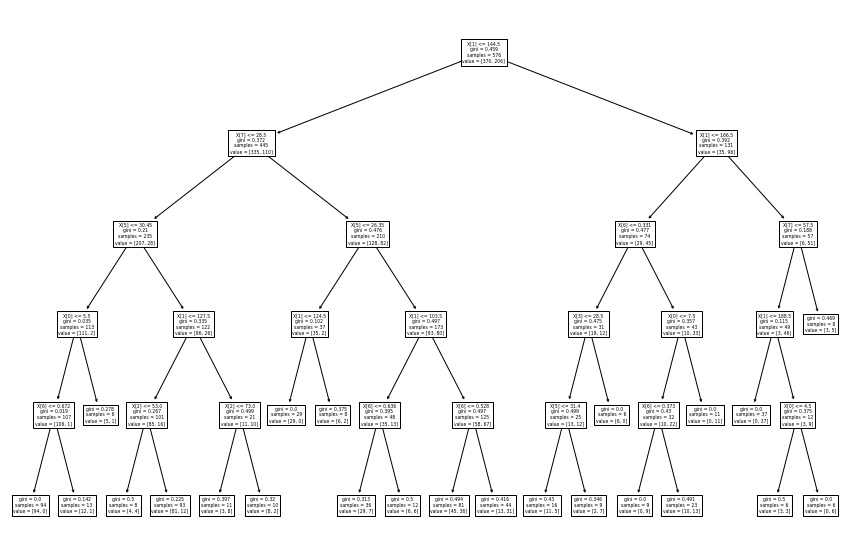

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(arbol_clasificador)
plt.show()

Resumiendo el camino seguido:
1. Se fijo el objetivo que fue rpedecir de un conjunto de caracteristicas si un paciente tiene probabilidad de padecer de diabetes.
2. Se obtuvieron los datos.
3. Exploramos los datos.
4. Preparamos los datos para un analisis.
5. Implementamos algoritmos supervisados, de los cules el más eficiente fue el de los arboles de desición con uns presición de aprximadamente el 80%.
6. Este solución para posteriores usos se plantea usarlos como un algoritmo de predicción de diabetes. De igual manera nos serviria buscar si otros algoritmos alternos como regresión logistica o maquinas de soprte de vectores nos ayudarian a clasiifcar con un mejor rendimiento un conjunto de pacientes.

# Lanzamiento
Este algoritmo podria intentar implementarse dentro de por ejemplo un servicio web tal ves como modelo muestra.